<a href="https://colab.research.google.com/github/taha-koroglu/gumushane_eem_eesec440/blob/main/code/classification_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En başta **kütüphaneleri** dahil ediyoruz.

First we import the **libraries**.

In [3]:
import tensorflow as tf # Google tarafından geliştirilen TF kütüphanesi, en ciddi rakibi Facebook tarfından geliştirilen Pytorch kütüphanesi
import matplotlib.pyplot as plt # grafik çizdirmek için
import numpy as np # numerical python kütüphanesi
import pandas as pd
import sys
from numpy import random # rasgele veri üretmek için kullanacağımız kütüphane

Bugün bakacağımız örnekte kendimiz sentetik **2-boyutlu veri** üretip ardından bu veriyi etiketleyeceğiz. Üreteceğimiz 2-boyutlu veri toplam n=1000 tane olacak. Bu veri kartezyen koordinat sistemi üzerinde x ve y eksenlerinde -1'den 1'e kadar yer alan aralıkta değer alan rasgele noktalar şeklinde düşünülebilir. Kartezyen koordinat sisteminde x ekseni x<sub>1</sub>, y ekseni ise x<sub>2</sub> isimlendirilecek. Burada **x** = (x<sub>1</sub>, x<sub>2</sub>)<sup>T</sup> bizim **özellik** vektörümüz.

In [18]:
n = 1000 # veri sayısı n = 20 (n = 1000 bu örnek için iyi bir seçim)
x = 2*random.rand(n,2)-1
#print(x)
#print(x[0,1])

Şimdi hedef verisini (**target data**) oluşturalım. Yani ürettiğimiz veriyi etiketleyelim (**data annotation**). Sınıflandırmayı dilediğimiz gibi yapabiliriz bu örnekte. Burada biz birim çember içersinde yer alan noktaları 1, dışında kalan noktaları 0 olarak etiketleyeceğiz.

In [19]:
t = np.zeros((n,1))
#print(t)
for i, point in enumerate(x):
  if (point[0]**2 + point[1]**2) >= 1:
    t[i] = 1
#print("Güncellenmiş hedef verisini yazdıralım.")
#print(t)

TF kütüphanesinin içerisinde yer alan **Keras** kütüphanesiyle bir tane çok katmanlı sinir ağı (**multi-layer perceptron - MLP**) oluşturalım. Giriş sayısının iki, çıkış sayısının bir olduğunu, gizli katman (**hidden layer**) sayısını ve bu katmanlardaki nöron sayısını (**number of neurons**) ve de hangi aktivasyon fonksiyonunu (**activation function**) kullandığımızı adım adım seçeceğiz.

In [20]:
model = tf.keras.models.Sequential(layers=None, name='2d_classifier_MLP')
model.add(tf.keras.layers.Dense(20, input_dim = 2, activation = 'tanh', name='HL1'))
model.add(tf.keras.layers.Dense(30, activation = 'tanh', name='HL2'))
model.add(tf.keras.layers.Dense(40, activation = 'tanh', name='HL3'))
model.add(tf.keras.layers.Dense(30, activation = 'tanh', name='HL4'))
model.add(tf.keras.layers.Dense(1, activation = 'tanh', name='outputLayer'))

Yukarıdaki kodda yapay sinir ağımızın yapısını (structure) yani katman sayısı, katmanlardaki nöron miktarı, nöron çıkışlarında kullanılan aktivasyon fonksiyon tiplerini belirledik. Bir sonraki adım olarak öğrenme (learning) işlemini başlatacağız. Şimdi öğrenme işleminin nasıl olacağını belirleyelim.

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "2d_classifier_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL1 (Dense)                  (None, 20)                60        
_________________________________________________________________
HL2 (Dense)                  (None, 30)                630       
_________________________________________________________________
HL3 (Dense)                  (None, 40)                1240      
_________________________________________________________________
HL4 (Dense)                  (None, 30)                1230      
_________________________________________________________________
outputLayer (Dense)          (None, 1)                 31        
Total params: 3,191
Trainable params: 3,191
Non-trainable params: 0
_________________________________________________________________


Son olarak konfigürasyonunu tamamladığımız çok katmanlı yapay sinir ağının eğitimini başlatıyoruz.

In [22]:
history = model.fit(x, t, epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 0.2150 - accuracy: 0.7787 - val_loss: 0.1728 - val_accuracy: 0.7850
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.7661 - val_loss: 0.1848 - val_accuracy: 0.7850
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1774 - accuracy: 0.7790 - val_loss: 0.1709 - val_accuracy: 0.7850
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.7859 - val_loss: 0.1712 - val_accuracy: 0.7850
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1681 - accuracy: 0.7882 - val_loss: 0.1789 - val_accuracy: 0.7850
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.7845 - val_loss: 0.1674 - val_accuracy: 0.7850
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.8146 - val_loss: 0.1715 - val_accuracy: 0.7850
Epoch 8/200


Şimdi eğitimi tamamlanmış yapay sinir ağımızı test edelim.

In [ ]:
model.predict(x).round()

Text(0.5, 0, 'epoch number')

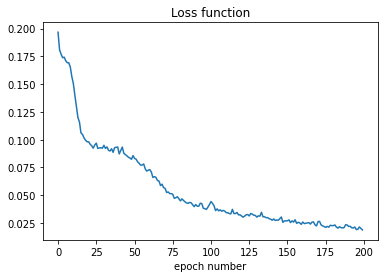

In [23]:
lossCurve = history.history["loss"]
plt.plot(lossCurve, label="Train")
# plt.legend(loc='upper right')
plt.title("Loss function")
plt.xlabel("epoch number")

Text(0.5, 0, 'epoch number')

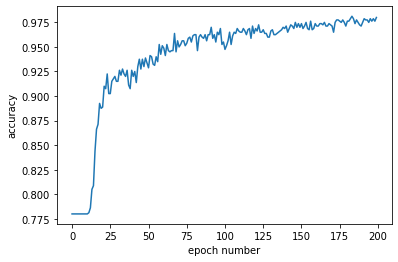

In [26]:
accuracyCurve = history.history["accuracy"]
plt.plot(accuracyCurve, label="Accuracy")
# plt.legend(loc='upper right')
plt.ylabel("accuracy")
plt.xlabel("epoch number")